In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from scipy.optimize import curve_fit
from lmfit import Model, minimize, Parameters, report_fit
from lmfit.models import GaussianModel, PolynomialModel
import astropy.units as u
import pandas as pd
import glob
import pandas as pd
import csv
import celerite

In [2]:
data = pd.read_csv('C:/Users/seven/Downloads/codarkfulldfII (2).csv')

In [3]:
data = data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

In [4]:
data

,l (deg),b (deg),line,comp,T_peak (K),T_error (K),CenterVel (km/s),CenterVel_error (km/s),FWHM (km/s),FWHM error (km/s),integral,integral error,Cloud,Upper Limit
0,119070,2800,HI,1,25.108944,0.262239,-4.629767,0.021005,1.847756,0.024123,128.081920,0.290790,Polaris,F
1,119070,2800,HI,2,6.805908,0.134199,-9.986011,0.218256,11.427903,0.200721,281.405440,0.755494,Polaris,F
2,119070,2800,67,1,0.086602,0.002528,-4.358241,0.037192,1.103239,0.037201,0.215733,0.004011,Polaris,F
3,119070,2800,67,2,0.002166,0.134199,0.925883,0.218256,0.925883,0.200721,0.002390,0.000081,Polaris,T
4,119070,2800,65,1,0.043520,0.002556,-4.251790,0.073304,1.081164,0.073336,0.106663,0.004928,Polaris,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,156540,3513,CO,2,0.126297,0.315815,-3.047263,0.079078,0.781650,0.084907,0.086818,0.006661,Ursa Major,T
216,156640,3250,HI,1,23.456820,0.679447,-0.742946,0.095651,2.861469,0.095685,134.853120,4.547945,Ursa Major,F
217,156640,3250,67,1,0.001190,0.001864,-0.204542,3.671439,-2.028824,3.671440,0.000000,0.000000,Ursa Major,F
218,156640,3250,65,1,0.002425,0.001370,0.949289,2.455072,3.763955,2.455072,0.023622,0.006867,Ursa Major,F


In [9]:
# indexes for each line:
idx67 = np.where((data['line'] == '67'))[0]
idx65 = np.where((data['line'] == '65'))[0]
idxHI = np.where((data['line'] == 'HI'))[0]
idxCO = np.where((data['line'] == 'CO'))[0]

In [10]:
#define CO XFac
XCO = 115
#define OH 1667 constant
#C1667 = 2.3*10**14

In [11]:
def OH67colden(Int, Tex, Tc, Interr): 
    '''Here we are defining the column density function for OH. Accepted argu ments are integral, excitation temperature, Tc, and integral error, where Tc ~3 Kelvin, Tcmb =~ 273K + Tsynchrotron'''
    
    resultsTable = pd.DataFrame(np.array([[0,
                                           0]]),
                                columns=['NOH67',
                                         'NOH67err'
                                        ])
    data = pd.read_csv('C:/Users/seven/Downloads/codarkfulldfII.csv')
    data = data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
    idx67 = np.where((data['line'] == '67'))[0]
    C1667 = 2.3*10**14
    #data67 = data[idx67]
    
    # Perform calculation using a for loop
    for index in Int.index:  # Use the index from the Pandas Series
        TempEq = Tex/(Tex-Tc)
        NOH = C1667 * TempEq * Int[index]
        NOHerr = C1667 * TempEq * Interr[index]
        
        resultsTable.loc[len(resultsTable)] = [NOH, NOHerr]
    return resultsTable
    

In [35]:
df67 = OH67colden(data['integral'][idx67], 5, 3, data['integral error'][idx67])
df67

,NOH67,NOH67err
0,0.000000e+00,0.000000e+00
1,1.240467e+14,2.306538e+12
2,1.374182e+12,4.633761e+10
3,8.914063e+13,5.153609e+12
4,4.048228e+13,2.429435e+12
5,5.375584e+12,9.582906e+11
6,1.186652e+14,2.263062e+12
7,1.398803e+12,4.344016e+10
8,1.398803e+12,4.344016e+10
9,8.360215e+13,4.320821e+12


In [21]:
def OH65colden(Int, Tex, Tc, Interr): 
    '''Here we are defining the column density function for OH. Accepted argu ments are integral, excitation temperature, Tc, and integral error, where Tc ~3 Kelvin, Tcmb =~ 273K + Tsynchrotron'''
    
    resultsTable = pd.DataFrame(np.array([[0,
                                           0]]),
                                columns=['NOH65',
                                         'NOH65err'
                                        ])
    data = pd.read_csv('C:/Users/seven/Downloads/codarkfulldfII.csv')
    data = data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
    idx65 = np.where((data['line'] == '65'))[0]
    C1665 = 2.3*10**14
    #data67 = data[idx67]
    
    # Perform calculation using a for loop
    for index in Int.index:  # Use the index from the Pandas Series
        TempEq = Tex/(Tex-Tc)
        NOH = C1665 * TempEq * Int[index]
        NOHerr = C1665 * TempEq * Interr[index]
        
        resultsTable.loc[len(resultsTable)] = [NOH, NOHerr]
    return resultsTable
    

In [22]:
df65 = OH65colden(data['integral'][idx65], 5, 3, data['integral error'][idx65])

In [23]:
def HIcolden(Int, Tex, Tc, Interr): 
    '''Here we are defining the column density function for OH. Accepted argu ments are integral, excitation temperature, Tc, and integral error, where Tc ~3 Kelvin, Tcmb =~ 273K + Tsynchrotron'''
    
    resultsTable = pd.DataFrame(np.array([[0,
                                           0]]),
                                columns=['NHI',
                                         'NHIerr'
                                        ])
    data = pd.read_csv('C:/Users/seven/Downloads/codarkfulldfII.csv')
    data = data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
    idxHI = np.where((data['line'] == 'HI'))[0]
    CHI = 1.82*10**18 #constant
    
    # Perform calculation using a for loop
    for index in Int.index:  # Use the index from the Pandas Series
        NHI = CHI * Int[index]
        NHIerr = CHI * Interr[index]
        
        resultsTable.loc[len(resultsTable)] = [NHI, NHIerr]
    return resultsTable
    

In [24]:
dfHI = HIcolden(data['integral'][idx65], 5, 3, data['integral error'][idx65])

In [17]:
def H2colden(Int, Tex, Tc, Interr): 
    '''Here we are defining the column density function for OH. Accepted argu ments are integral, excitation temperature, Tc, and integral error, where Tc ~3 Kelvin, Tcmb =~ 273K + Tsynchrotron'''
    
    resultsTable = pd.DataFrame(np.array([[0,
                                           0]]),
                                columns=['NH2',
                                         'NH2err'
                                        ])
    data = pd.read_csv('C:/Users/seven/Downloads/codarkfulldfII.csv')
    data = data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
    idxCO = np.where((data['line'] == 'CO'))[0]
    XCO =  1#constant
    
    # Perform calculation using a for loop
    for index in Int.index:  # Use the index from the Pandas Series
        NH2 = XCO * Int[index]
        NH2err = XCO * Interr[index]
        
        resultsTable.loc[len(resultsTable)] = [NH2, NH2err]
    return resultsTable
'''DETERMINE XCO BEFORE FINISHING'''

'DETERMINE XCO BEFORE FINISHING'

Text(0, 0.5, 'OH65 Column Density [cm^-2]')

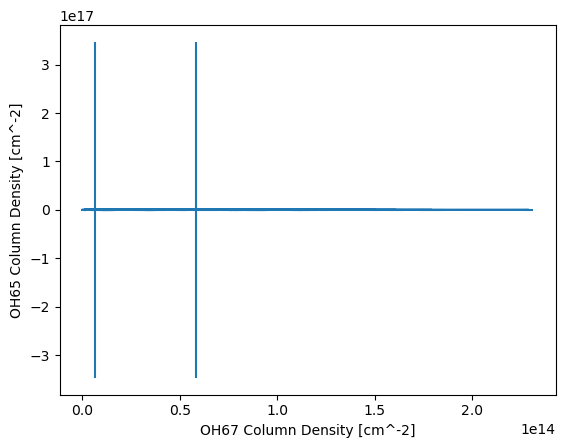

In [34]:
plt.errorbar(df67['NOH67'], df65['NOH65'], xerr = df67['NOH67err'], yerr = df65['NOH65err'], ls = '-')
plt.xlabel('OH67 Column Density [cm^-2]')
plt.ylabel('OH65 Column Density [cm^-2]')

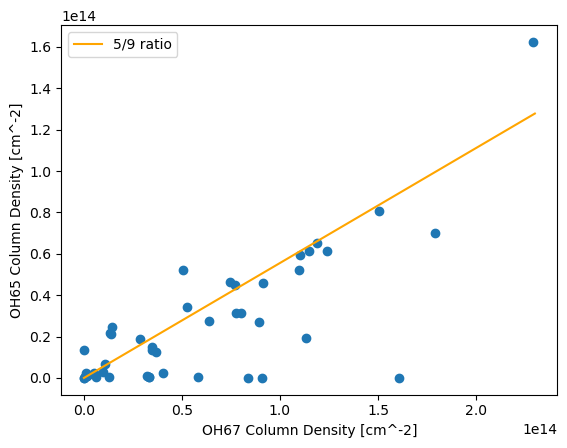

In [37]:
plt.scatter(df67['NOH67'], df65['NOH65'])
plt.xlabel('OH67 Column Density [cm^-2]')
plt.ylabel('OH65 Column Density [cm^-2]')
x = np.linspace(0, 2.3*10**14, 50)
y = (5/9)*x
plt.plot(x, y, color = 'orange', label = '5/9 ratio')
plt.legend()